In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt


Matplotlib is building the font cache; this may take a moment.


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


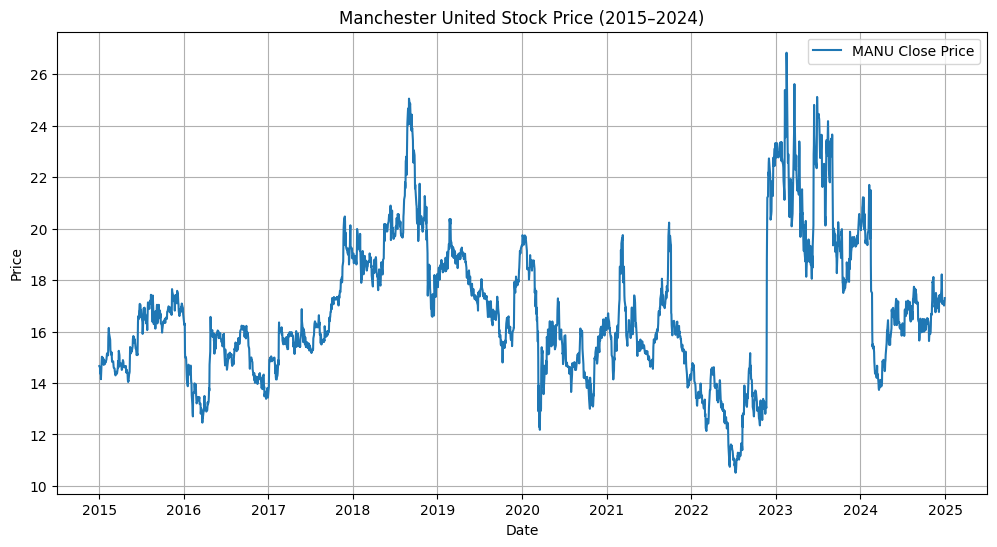

In [2]:
manu = yf.download("MANU", start="2015-01-01", end="2024-12-31")
manu.to_csv("manu_stock.csv")
manu.head()
plt.figure(figsize=(12,6))
plt.plot(manu.index, manu['Close'], label='MANU Close Price')
plt.title("Manchester United Stock Price (2015–2024)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


 Player Transfer and Match Outcome Data Collection


In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


In [6]:
import time


In [7]:

headers = {
    "User-Agent": "Mozilla/5.0"
}
seasons = [2020, 2021, 2022, 2023]  # 2020–2021 to 2023–2024
all_transfers = []

for season in seasons:
    print(f"Scraping season {season}/{season + 1}...")
    url = f"https://www.transfermarkt.com/manchester-united/transfers/verein/985/saison_id/{season}"
    
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, "lxml")
    
    try:
        # First table = arrivals
        table = soup.find_all("table", {"class": "items"})[0]
        rows = table.find_all("tr", {"class": ["odd", "even"]})
        
        for row in rows:
            columns = row.find_all("td")
            if len(columns) > 1:
                player = columns[0].text.strip()
                position = columns[1].text.strip()
                age = columns[2].text.strip()
                nationality = columns[3].img['title'] if columns[3].img else "N/A"
                club_from = columns[5].img['alt'] if columns[5].img else "N/A"
                fee = columns[-1].text.strip()
                
                all_transfers.append({
                    "Season": f"{season}/{season + 1}",
                    "Player": player,
                    "Position": position,
                    "Age": age,
                    "Nationality": nationality,
                    "From": club_from,
                    "Fee": fee
                })
    except Exception as e:
        print(f"Error scraping {season}: {e}")
    
    time.sleep(2)  # Polite delay to avoid getting blocked

df_all_transfers = pd.DataFrame(all_transfers)
df_all_transfers.to_csv("manu_transfers_2020_2024.csv", index=False)

# Display first few rows
df_all_transfers.head()


Scraping season 2020/2021...
Scraping season 2021/2022...
Scraping season 2022/2023...
Scraping season 2023/2024...


,Season,Player,Position,Age,Nationality,From,Fee
0,2020/2021,,Donny van de Beek \n\n\nCentral Midfield,,N/A,N/A,€39.00m
1,2020/2021,,Amad Diallo \n\n\nRight Winger,,N/A,N/A,€21.30m
2,2020/2021,,Alex Telles \n\n\nLeft-Back,,N/A,N/A,€15.00m
3,2020/2021,,Facundo Pellistri \n\n\nLeft Winger,,N/A,N/A,€8.65m
4,2020/2021,,Edinson Cavani \n\n\nCentre-Forward,,N/A,N/A,free transfer


In [8]:
df_transfers.to_csv("manu_transfers.csv", index=False)
